# Example notebooks for the pipelines

## SPOC

In [1]:
from datasets import load_dataset
from datasets.data_files import DataFilesPatternsDict
import matplotlib.pyplot as plt 
import numpy as np

/Users/rogersb/Desktop/first_year/MultimodalUniverse/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
data_files = DataFilesPatternsDict.from_patterns({"train": ["./tiny_spoc/SPOC/healpix=*/*.hdf5"]})
spoc = load_dataset("./spoc.py", data_files = data_files, trust_remote_code=True)
spoc_dset = spoc.with_format('numpy')['train']

Repo card metadata block was not found. Setting CardData to empty.


In [18]:
dset = iter(spoc_dset)
spoc_example = next(dset)

In [20]:
print(f"The keys of the dataset are: {list(spoc_example.keys())}")
print(f"The keys of the lightcurve are: {list(spoc_example['lightcurve'].keys())}")

The keys of the dataset are: ['lightcurve', 'RA', 'DEC', 'TIC_ID']
The keys of the lightcurve are: ['time', 'flux', 'flux_err', 'quality']


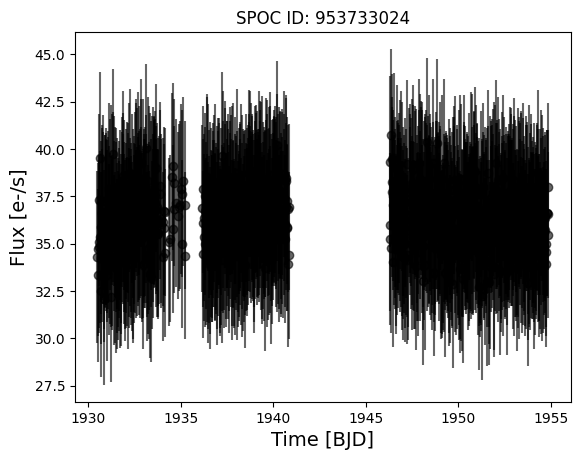

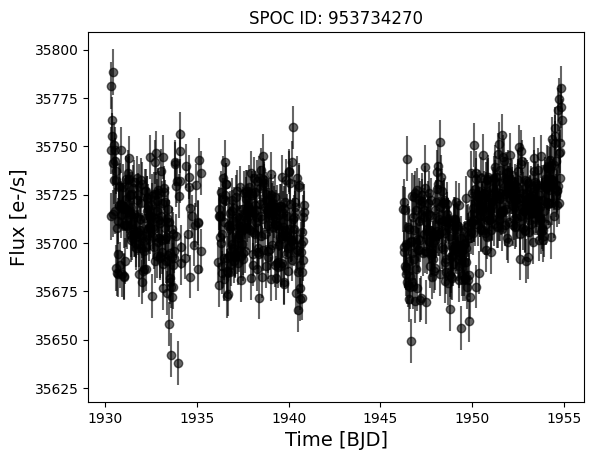

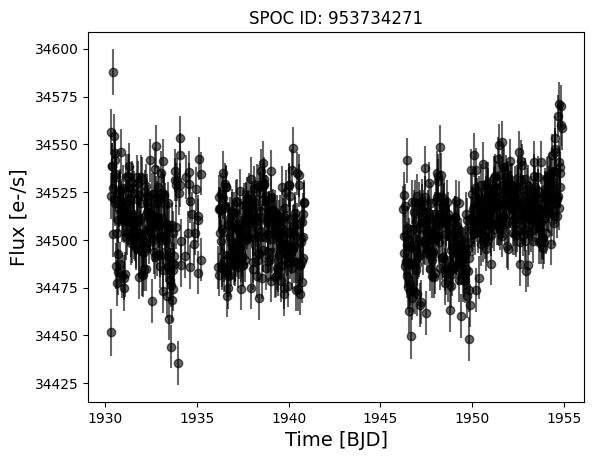

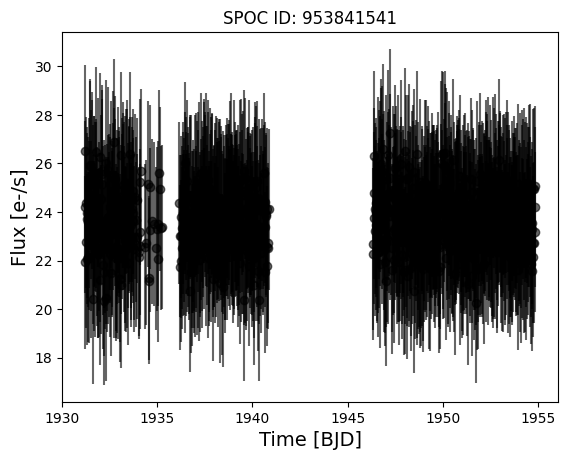

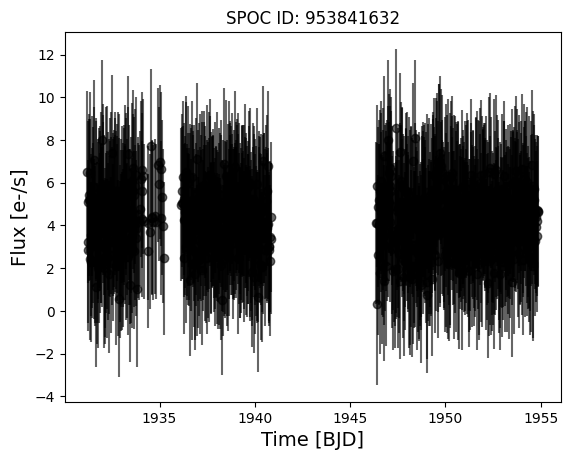

In [89]:
for i in range(5):
    spoc_example = next(dset)
    plt.errorbar(spoc_example['lightcurve']['time'], spoc_example['lightcurve']['flux'], yerr=spoc_example['lightcurve']['flux_err'], marker='o', alpha=0.6, ls='none', c='black')

    plt.xlabel('Time [BJD]', fontsize=14)
    plt.ylabel('Flux [e-/s]', fontsize=14)

    plt.title(f"SPOC ID: {spoc_example['TIC_ID']}")
    plt.show()
    # To-Do: TESS flags

## TGLC

In [26]:
data_files = DataFilesPatternsDict.from_patterns({"train": ["./tiny_tglc/TGLC/healpix=*/*.hdf5"]})
tglc = load_dataset("./tglc.py", data_files = data_files, trust_remote_code=True)
tglc_dset = tglc.with_format('numpy')['train']
tglc_dset = iter(tglc_dset)
tglc_example = next(tglc_dset)
print(f"The keys of the dataset are: {list(tglc_example.keys())}")
print(f"The keys of the lightcurve are: {list(tglc_example['lightcurve'].keys())}")

Repo card metadata block was not found. Setting CardData to empty.


The keys of the dataset are: ['lightcurve', 'RA', 'DEC', 'TIC_ID', 'GAIADR3_ID', 'aper_flux_err', 'psf_flux_err']
The keys of the lightcurve are: ['time', 'psf_flux', 'aper_flux', 'tess_flags', 'tglc_flags']


In [27]:
def precision(flux): 
    '''
    Precision estimate from the Han & Brandt paper for TGLC lightcurves (https://arxiv.org/abs/2301.03704)
    Parameters
    ----------
    flux : np.ndarray
        The flux of the lightcurve.
    Returns
    -------
    precision : float
        The precision of the lightcurve.
    ''' 
    return 1.48 * (1/np.sqrt(2)) * np.median(np.abs(np.diff(flux)))

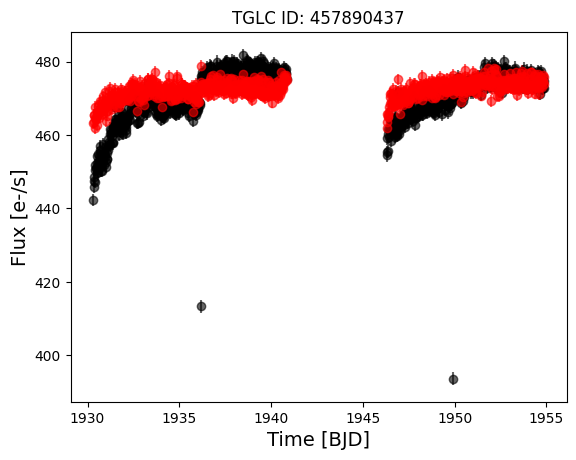

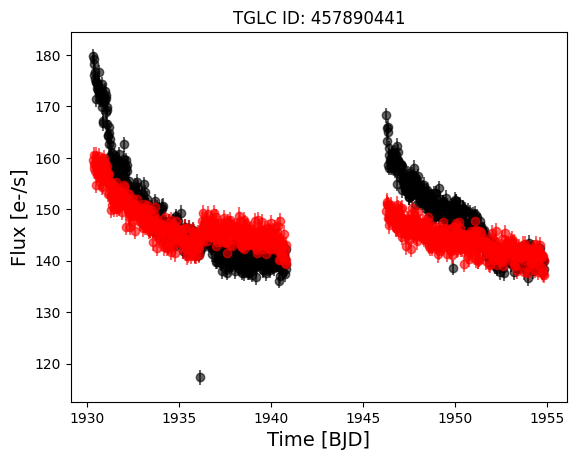

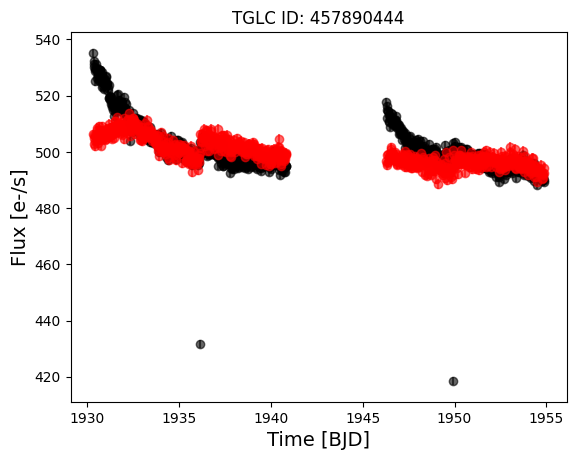

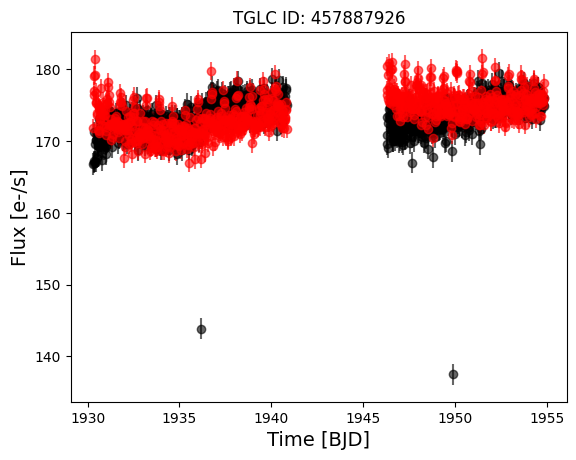

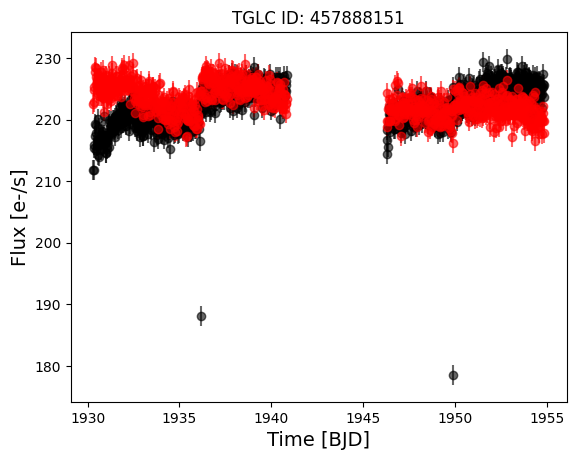

In [88]:
for i in range(5):
    tglc_example = next(tglc_dset)
    idx = (~np.isnan(tglc_example['lightcurve']['aper_flux'])) & (~tglc_example['lightcurve']['tglc_flags'].astype(np.bool))
    # To-Do: Think about GAIA flags also here..

    plt.errorbar(tglc_example['lightcurve']['time'][idx], tglc_example['lightcurve']['aper_flux'][idx], yerr=precision(tglc_example['lightcurve']['aper_flux'][idx]), marker='o', alpha=0.6, ls='none', c='black')

    idx = (~np.isnan(tglc_example['lightcurve']['psf_flux'])) & (~tglc_example['lightcurve']['tglc_flags'].astype(np.bool))
    try:
        plt.errorbar(tglc_example['lightcurve']['time'][idx], tglc_example['lightcurve']['psf_flux'][idx], yerr=precision(tglc_example['lightcurve']['psf_flux'][idx]), marker='o', alpha=0.6, ls='none', c='red')
    except:
        print("No PSF flux available")
        
    plt.xlabel('Time [BJD]', fontsize=14)
    plt.ylabel('Flux [e-/s]', fontsize=14)

    plt.title(f"TGLC ID: {tglc_example['TIC_ID']}")
    plt.show()

## QLP

In [29]:
data_files = DataFilesPatternsDict.from_patterns({"train": ["./tiny_qlp/QLP/healpix=*/*.hdf5"]})
qlp = load_dataset("./qlp.py", data_files = data_files, trust_remote_code=True)
qlp_dset = qlp.with_format('numpy')['train']

Repo card metadata block was not found. Setting CardData to empty.


In [82]:
qlp_dset = iter(qlp_dset)
qlp_example = next(qlp_dset)

In [83]:
print(f"The keys of the dataset are: {list(qlp_example.keys())}")
print(f"The keys of the lightcurve are: {list(qlp_example['lightcurve'].keys())}")

The keys of the dataset are: ['lightcurve', 'RA', 'DEC', 'TIC_ID']
The keys of the lightcurve are: ['time', 'flux', 'flux_err', 'quality']


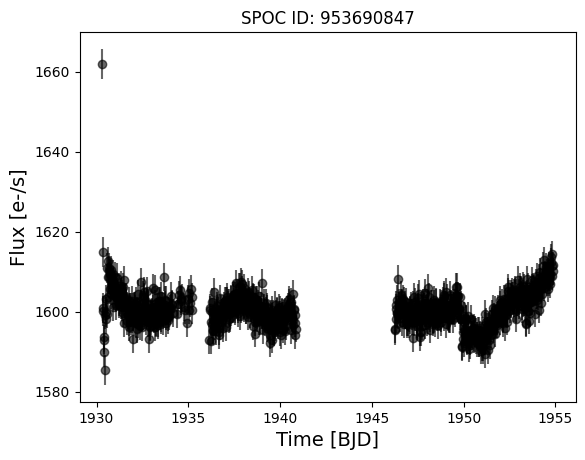

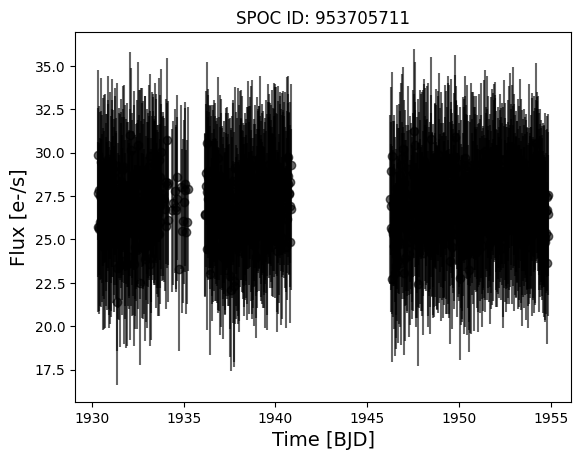

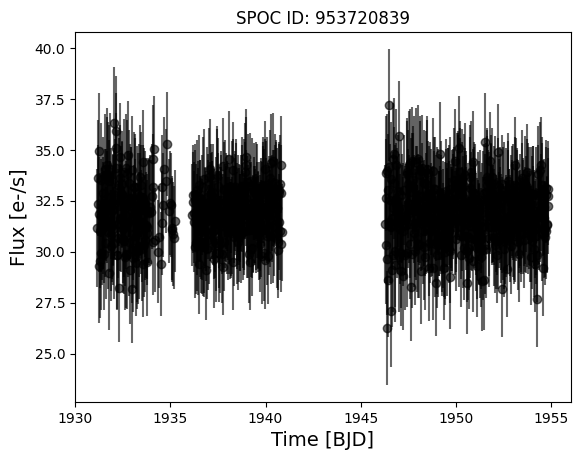

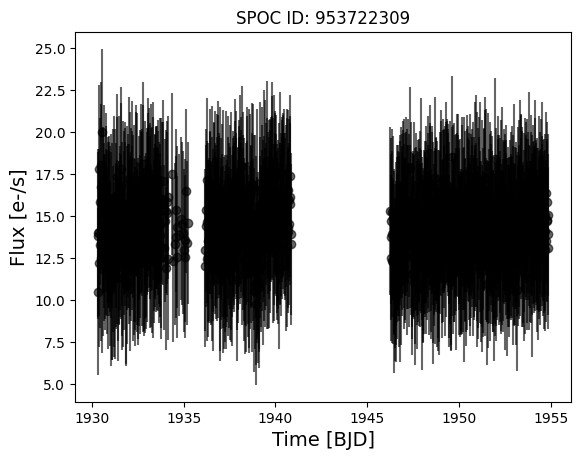

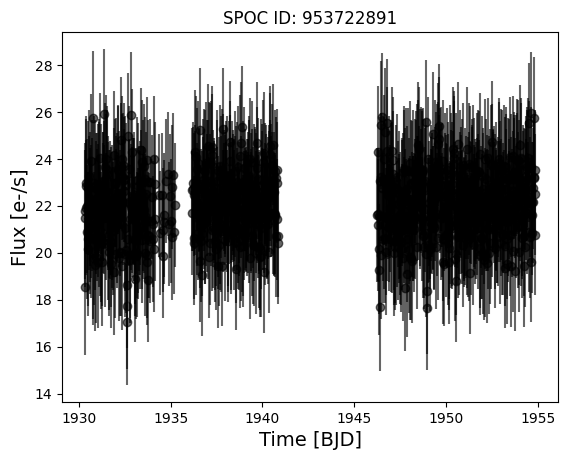

In [85]:
for i in range(5):
    qlp_example = next(qlp_dset)
    plt.errorbar(qlp_example['lightcurve']['time'], qlp_example['lightcurve']['flux'], yerr=qlp_example['lightcurve']['flux_err'], marker='o', alpha=0.6, ls='none', c='black')

    plt.xlabel('Time [BJD]', fontsize=14)
    plt.ylabel('Flux [e-/s]', fontsize=14)

    plt.title(f"SPOC ID: {qlp_example['TIC_ID']}")
    plt.show()
    # To-Do: TESS flags